# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes , No (**Target**)  
    * **Age**	:	나이  
    * **DistanceFromHome**	:	집-직장 거리(마일)  
    * **EmployeeNumber**	:	사번  
    * **Gender**	:	성별(Male, Female)  
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조  
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)  
    * **MonthlyIncome**	:	월급(달러)  
    * **OverTime**	:	야근여부  
    * **PercentSalaryHike**	:	전년대비 급여인상율(%)  
    * **TotalWorkingYears**	:	총 근무 연수  



* Attrition

## **2.범주-->범주**

In [3]:
target = 'Attrition'

In [9]:
def eda_cat(feature, target, data):
    # crosstab
    table = pd.crosstab(data[target], data[feature], normalize = 'columns')
    print(table)
    print("-" * 100)
    
    # mosaic plot
    mosaic(data, [ feature,target])
    plt.axhline(1- data[target].mean(), color = 'r')
    plt.show()
    
    # chi2
    # 먼저 집계
    table = pd.crosstab(data[target], data[feature])
    print('교차표\n', table)
    print('-' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    print('기대빈도\n',result[3])

### **(1) Gender --> Attrition**

In [19]:
feature = 'Gender'

* 교차표

In [20]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [21]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

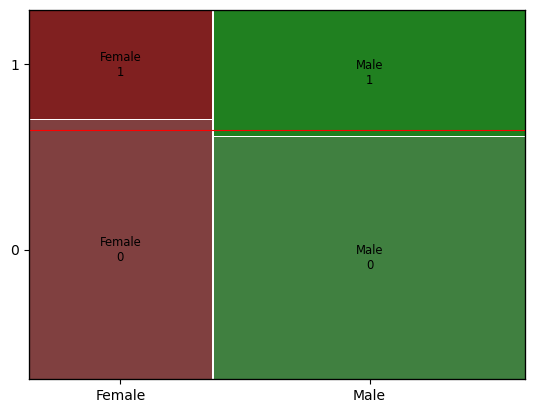

In [22]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r', linewidth = 0.8)
plt.show()

* 수치화 : 카이제곱검정

In [23]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1
기대빈도
 [[150.525 254.475]
 [ 72.475 122.525]]


* 파악된 내용을 기술해 봅시다.

In [24]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

### **(2) JobSatisfaction --> Attrition**

In [69]:
feature = 'JobSatisfaction'

* 교차표

In [70]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,74,79,114,138
1,52,37,59,47


* 시각화

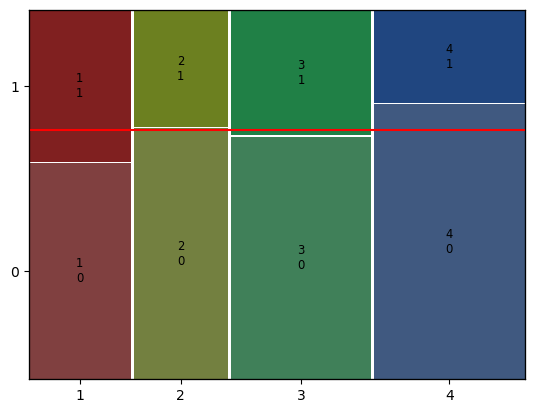

In [71]:
temp = data.sort_values(feature)
mosaic(temp, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [28]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.884191097554549
p-value 0.03087092125625072
자유도 3
기대빈도
 [[ 85.05   78.3   116.775 124.875]
 [ 40.95   37.7    56.225  60.125]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 직무 만족도는 그래프 상에서는 관련이 있어보이고, 카이제곱검정을 통해서도 약하게 관련이 있다고 나타남.
# 매우 불만인 사람은 평균 이직률보다 높고, 매우 만족인 사람은 평균 이직률보다 낮다.

### **(3) MaritalStatus --> Attrition**

In [66]:
feature = 'MaritalStatus'

* 교차표

In [67]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


* 시각화

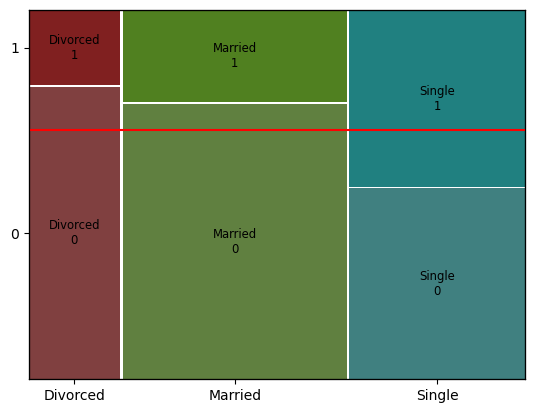

In [68]:
temp = data.sort_values(feature)

mosaic(temp, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [38]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 37.829711907070525
p-value 6.100738829354226e-09
자유도 2
기대빈도
 [[ 75.6  184.95 144.45]
 [ 36.4   89.05  69.55]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 결혼 여부는 이직률과 관련이 있다고 보여진다. 카이제곱 검정을 통해서도 결혼여부가 이직률과 강한 연관이 있다고 판단됨.
# 미혼이라면 이직률이 평균이직률보다 높다.

### **(4) OverTime --> Attrition**

In [39]:
feature = 'OverTime'

* 교차표

In [40]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

OverTime,No,Yes
Attrition,,
0,315,90
1,90,105


* 시각화

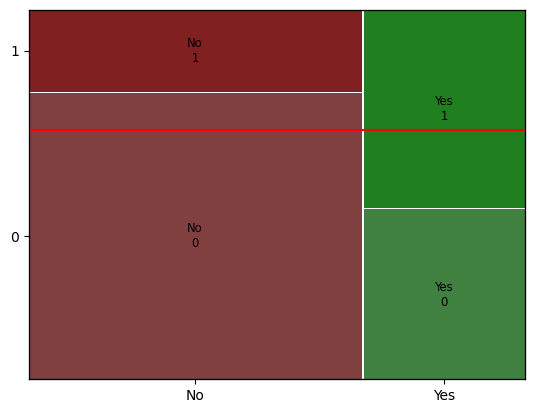

In [41]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [42]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          315   90
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 58.57149427899665
p-value 1.9603625783060702e-14
자유도 1
기대빈도
 [[273.375 131.625]
 [131.625  63.375]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 야근 여부 역시 그래프 상에서 큰 연관이 있어 보인다. 카이제곱검정에서도 큰 연관이 있다고 판단됨.
# 야근한다면 이직률이 평균이직률보다 높아진다.

## **3.숫자-->범주**

### **(1) Age --> Attrition**

In [30]:
feature = 'Age'

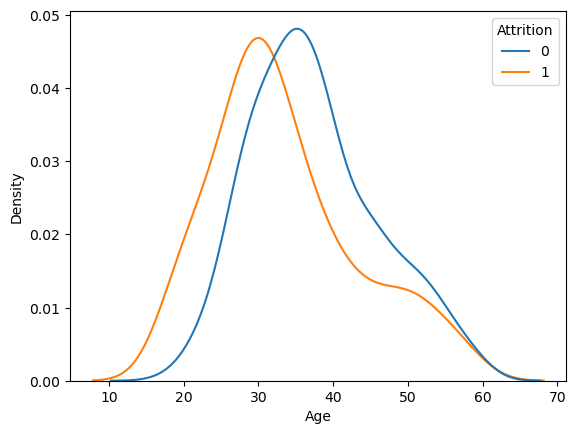

In [31]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

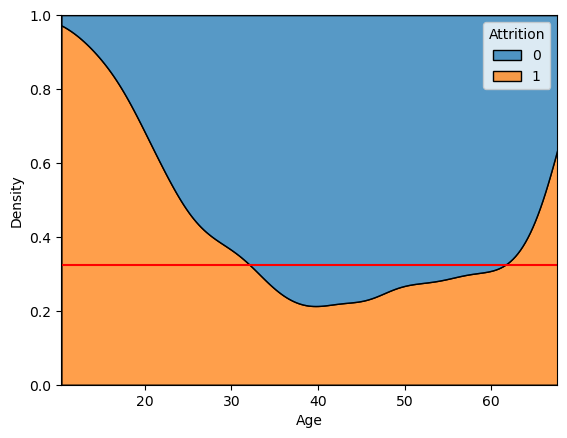

In [34]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 약 32세를 전후로 젊은 직원들의 이직률이 평균 이직률보다 높고, 나이가 많은 직원들의 이직률이 평균 이직률보다 낮아진다.

### **(2) DistanceFromHome --> Attrition**

In [43]:
feature = 'DistanceFromHome'

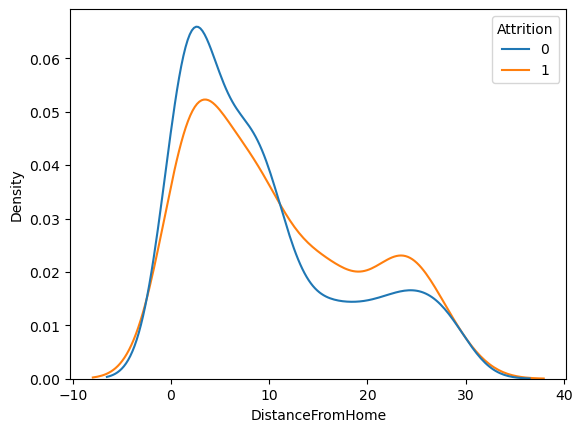

In [44]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

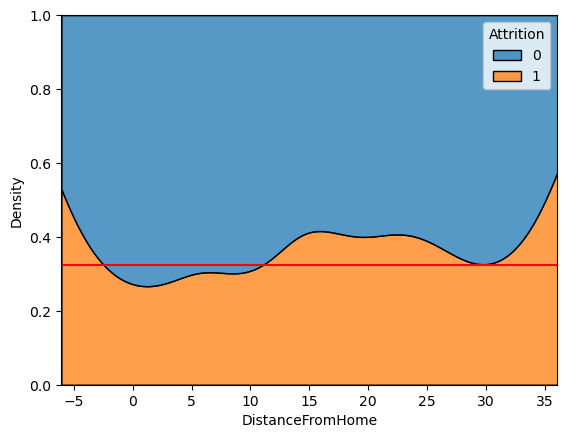

In [45]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

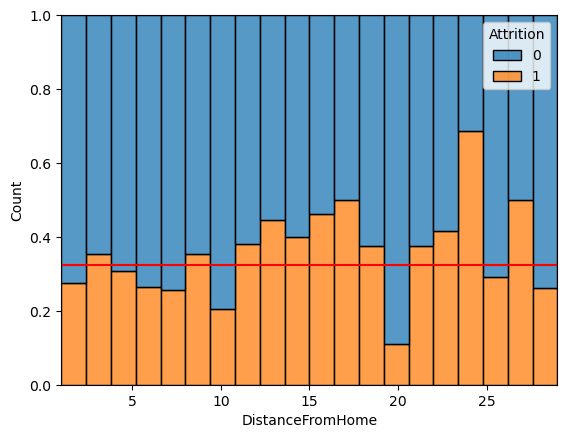

In [47]:
sns.histplot(x= feature, data = data, hue = target, bins = 20
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 집과 회사의 거리가 약 11 정도 이상 되는 직원들의 이직률이 높아보인다.
# 

In [52]:
temp = pd.cut(data[feature], bins = (0, 5, 10, 15, 20, 25, 30), labels = ["5", "10", "15", "20", "25", "30"])
temp = pd.concat([temp, data[target]], axis=1)
temp.head()

,DistanceFromHome,Attrition
0,5,0
1,10,0
2,5,0
3,5,0
4,5,0


In [53]:
# 먼저 집계
table = pd.crosstab(temp[target], temp['DistanceFromHome'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 DistanceFromHome    5   10  15  20  25  30
Attrition                                 
0                 175  109  29  31  33  28
1                  72   44  21  18  29  11
----------------------------------------------------------------------------------------------------
카이제곱통계량 10.784155677764197
p-value 0.055831529589478554
자유도 5
기대빈도
 [[166.725 103.275  33.75   33.075  41.85   26.325]
 [ 80.275  49.725  16.25   15.925  20.15   12.675]]


### **(3) MonthlyIncome --> Attrition**

In [54]:
feature = 'MonthlyIncome'

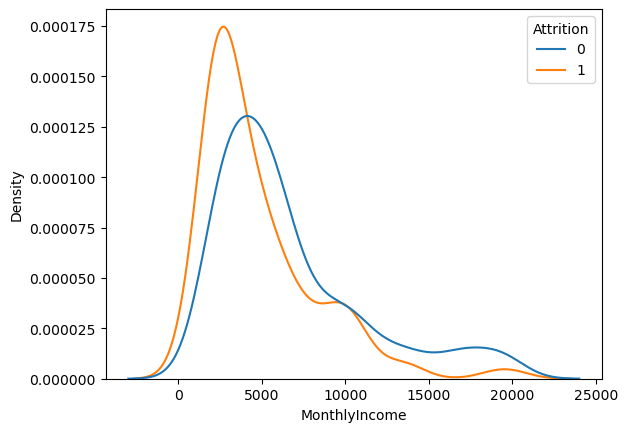

In [55]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

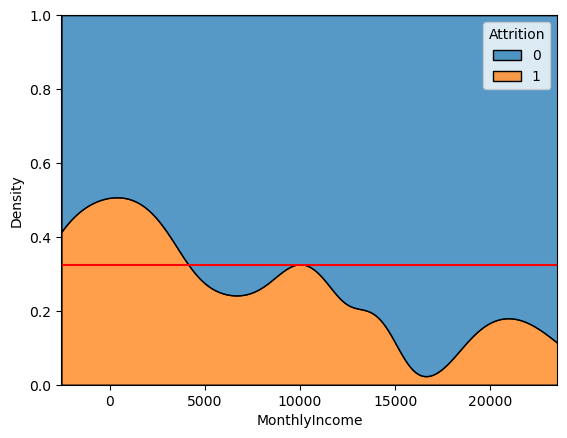

In [56]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 월급이 5000보다 낮은 구간은 평균이직률보다 높다.
# 5000보다 높으면 평균이직률보다 낮아진다.

In [76]:
temp = pd.cut(data[feature], (0, 5000, np.inf), labels = [0, 1])
temp = pd.concat([temp, data[target]], axis=1)
temp.head()

,JobSatisfaction,Attrition
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [78]:
spst.ttest_ind(temp[feature], temp[target])
# 구간을 5000 기준으로 나눴더니 월급이 적은 그룹이 월급이 많은 그룹보다 평균 이직률이 높은게 확인.

TtestResult(statistic=-16.982561862316516, pvalue=4.0017643012080554e-58, df=1198.0)

### **(4) PercentSalaryHike --> Attrition**

In [57]:
feature = 'PercentSalaryHike'

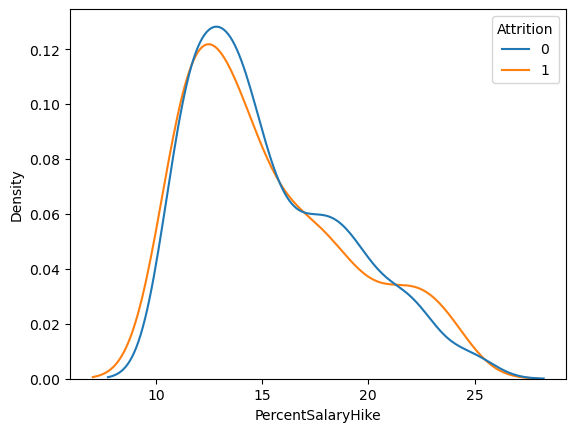

In [58]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

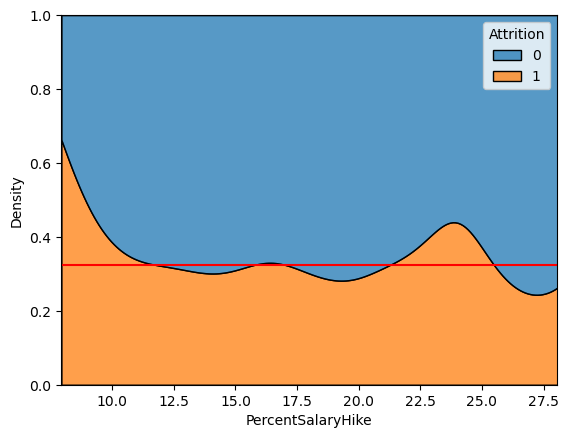

In [59]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 급여 인상률은 크게 관련이 없어보인다. 

### **(5) TotalWorkingYears --> Attrition**

In [60]:
feature = 'TotalWorkingYears'

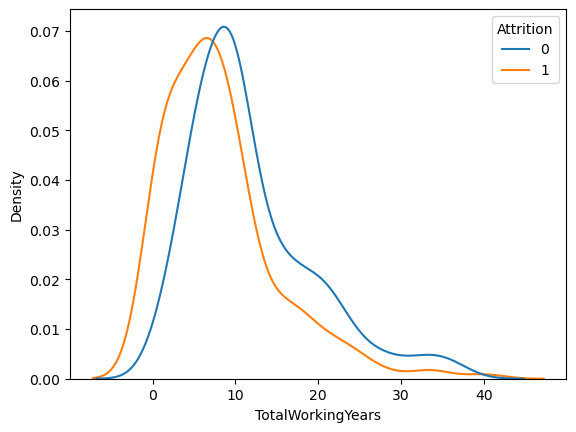

In [62]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

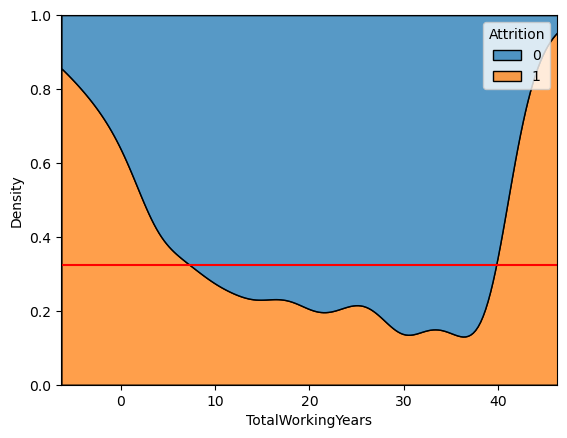

In [63]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 근속 년수가 약 9년이 안된 직원들의 이직률은 평균 이직률보다 높지만, 그 이상이면 이직률이 낮아진다.

## **4.관계 정리하기**

① 강한관계

In [ ]:
# OverTime, Age, MonthlyIncome (강사님 의견  + MaritalSatatus, DistanceFromHome)

② 중간관계

In [ ]:
# MaritalStatus, TotalWorkingYears, DistanceFromHome, TotalWorkingYears 

③ 관계없음(약한 관계)

In [ ]:
# Gender, JobSatisfaction, PercentSalaryHike